In [121]:
# importing the necessary libraries for training a model using Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [122]:
df=pd.read_csv('../data/Diabetes_Cleaned.csv')


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               615 non-null    int64  
 1   Glucose                   615 non-null    float64
 2   BloodPressure             615 non-null    float64
 3   SkinThickness             615 non-null    float64
 4   Insulin                   615 non-null    float64
 5   BMI                       615 non-null    float64
 6   DiabetesPedigreeFunction  615 non-null    float64
 7   Age                       615 non-null    int64  
 8   Outcome                   615 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 43.4 KB


In [124]:
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.0,35.0,30.50,33.6,0.627,50,1
1,1,85.00,66.0,29.0,30.50,26.6,0.351,31,0
2,8,183.00,64.0,23.0,30.50,23.3,0.672,32,1
3,1,89.00,66.0,23.0,94.00,28.1,0.167,21,0
4,5,116.00,74.0,23.0,30.50,25.6,0.201,30,0
5,3,78.00,50.0,32.0,88.00,31.0,0.248,26,1
6,10,115.00,72.0,23.0,30.50,35.3,0.134,29,0
7,8,125.00,96.0,23.0,30.50,32.0,0.232,54,1
8,4,110.00,92.0,23.0,30.50,37.6,0.191,30,0
9,10,168.00,74.0,23.0,30.50,38.0,0.537,34,1


In [125]:
# lets separate the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [126]:
# After separating the features and target variable, we will split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Now Scaling the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [128]:
# Now lets make an instance of the Logistic Regression model ans use class_weight='balanced' to handle class imbalance

model = LogisticRegression(class_weight='balanced', max_iter=1000)


In [129]:
# now lets fit the model on the training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [130]:
# Predicting the target variable on the test set
y_pred = model.predict(X_test)

In [131]:
# After predicting the outcomes, we will evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Now lets print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')





Accuracy: 0.6829268292682927
Confusion Matrix:
[[61 31]
 [ 8 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.76        92
           1       0.43      0.74      0.54        31

    accuracy                           0.68       123
   macro avg       0.65      0.70      0.65       123
weighted avg       0.77      0.68      0.70       123



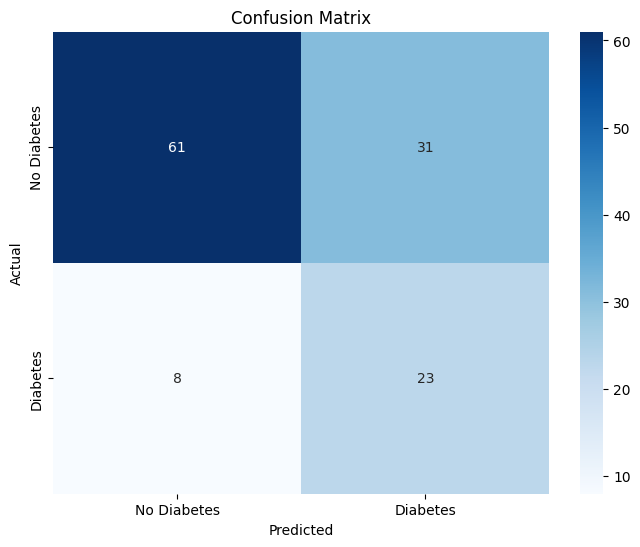

In [132]:
# Lets visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [133]:
# Lets predict the new data
new_data = [[5, 116, 74, 0, 0, 25.6, 0.201, 30]]  # Example data point
new_data_scaled = scaler.transform(new_data)  # Scale the new data
new_prediction = model.predict(new_data_scaled)
# Print the prediction for the new data
print(f'Prediction for new data: {new_prediction[0]}')  # 0
print(f'You have {"Diabetes" if new_prediction[0] == 1 else "No Diabetes"}')


Prediction for new data: 0
You have No Diabetes


d:\ML(ExtraClass Project)\DiabetoScan-Predicting-Diabetes-with-Logistic-Regression\.diabetoscanenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [134]:
new_data_test=[[6,148,72,35,0,33.6,0.627,50]]
new_data_scaled_test = scaler.transform(new_data_test)  # Scale the new data
new_prediction_test = model.predict(new_data_scaled_test)
# Print the prediction for the new data
print(f'Prediction for new data test: {new_prediction_test[0]}')  # 1
print(f'You have {"Diabetes" if new_prediction_test[0] == 1 else "No Diabetes"}')

Prediction for new data test: 1
You have Diabetes


d:\ML(ExtraClass Project)\DiabetoScan-Predicting-Diabetes-with-Logistic-Regression\.diabetoscanenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [135]:
# lets check again in another new data
another_new_data = [[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]]
another_new_data_scaled = scaler.transform(another_new_data)
another_new_prediction = model.predict(another_new_data_scaled)
print(f'Prediction for another new data: {another_new_prediction[0]}')
print(f'You have {"Diabetes" if another_new_prediction[0] == 1 else "No Diabetes"}')

Prediction for another new data: 0
You have No Diabetes


d:\ML(ExtraClass Project)\DiabetoScan-Predicting-Diabetes-with-Logistic-Regression\.diabetoscanenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [136]:
# Now lets save the model and the scaler using joblib
import joblib
# Save the model
joblib.dump(model, '../notebook/diabetes_model.pkl')
# Save the scaler
joblib.dump(scaler, '../notebook/scaler.pkl')

['../notebook/scaler.pkl']